Исходная система: $ \\ $
\begin{cases}
   \dot{x}_1 = x_2, \\
   \dot{x}_2 = x_1(t-h) + u(t).
\end{cases}
Метод прямых: $ \\ $
https://studme.org/180963/matematika_himiya_fizik/metod_pryamyh

$x(t - h) = x_m  \\ $
$x_0' = x'(t) = x_m + u(t);  \\ $
$ x_1 = x(t - \frac{h}{m}) = x(t) - x'(t)\frac{h}{m}; \ x_0' = (x_0 - x_1)\frac{m}{h} \\ $

\begin{cases}
\dot{x}_0 = x_m(t) + u(t) = f_1, \\ 
\dot{x}_1 = (x_0(t) - x_1(t))\frac{m}{h} = f_2, \\ 
\dot{x}_2 = (x_1(t) - x_2(t))\frac{m}{h} = f_3, \\ 
\dots \\ 
\dot{x}_m = (x_{m-1}(t) - x_m(t))\frac{m}{h} = f_{m+1}. \\ 
\end{cases}
$ \\ $ 
Для решения данной системы необходимо определить оптимальное управление(ПМП). 

Гамильтониан:
$H = \psi_0f_0 + \psi_1f_1 \dots \psi_mf_m$.
Где $f_0 -$ подфункциональное выражение (в моем случае это 0). $ \\ $
Его необходимо максимизировать. $ \\ $
Для нахождения $\psi$ нужно решить сорпяженную систему(записал в векторном виде):
\begin{equation}
\dot\psi = A\psi,
\end{equation}
где:
\begin{equation}
A = \frac{h}{m} 
\begin{pmatrix}
0 & 1 & 0 & \dots & 0  \\
0 & -1 & 1 & \dots & 0 \\
\dots & \dots & \dots & \dots & \dots \\
0& 0 &0 &\dots& 1 \\
\frac{m}{h}& 0 & 0& \dots& -1
\end{pmatrix}
\end{equation}


Так как элемент управления есть только в $f_1$, то необходимо максимизировать выражение: $ \\ $
$\psi_1 \cdot u \underset{u}{\rightarrow} \max  \\ $
Предположим что на управление наложено ограничение: $|u| \leq 1.$ Тогда исходя из этого ограничения и элемента который необходимо максимизировать, можно сделать вывод, что $u = sgn(\psi_1).$ Осталось найти $\psi_1$.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import expm

In [51]:
#Сопряженная система
def F_conj_syst(psi,t,m,h):
    dpsidt = np.zeros(m+1)
    dpsidt[0] = psi[1]*m/h
    dpsidt[m] = psi[0] - psi[m]*m/h
    for i in range(1,m):
        dpsidt[i] = (m/h) * (-psi[i] + psi[i-1])
    return dpsidt 

Text(0, 0.5, '$\\psi_1$')

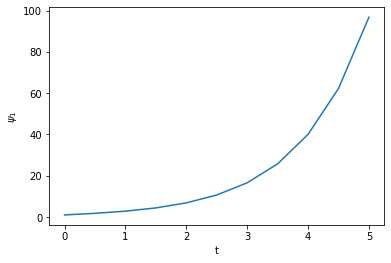

In [69]:
m = 10
h = 7
t_0 = 0
t_1 = 5
t = np.linspace(t_0,t_1,m+1)
psi_0 = np.ones(m+1)
sol = odeint(F_conj_syst,psi_0,t, args = (m,h))
plt.plot(t,sol[:,0])
plt.xlabel('t')
plt.ylabel('$\psi_1$')

Получается, что $\psi_1 \geq 0$. Тогда делаем вывод, что $u = 1$ и решаем исходнуюю систему.

In [1]:
#Исходная система с известным управлением
def F_main_syst(x,t,m,h,u):
    dxdt = np.zeros(m+1)
    dxdt[0] = x[m] + u
    for i in range(1,m+1):
        dxdt[i] = (m/h) * (x[i - 1] - x[i])
    return dxdt 

Text(0, 0.5, '$x_1$')

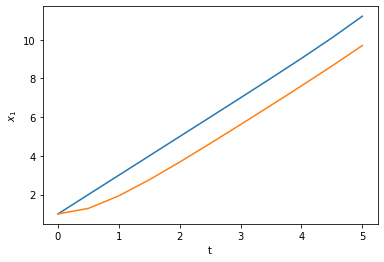

In [5]:
m = 10
h = 7
t_0 = 0
t_1 = 5
u = 1
t = np.linspace(t_0,t_1,m+1)
x_0 = np.ones(m+1)
sol = odeint(F_main_syst,x_0,t, args = (m,h,u))
plt.plot(t,sol[:,0],t,sol[:,1])
plt.xlabel('t')
plt.ylabel('$x_1$')

Двумерная система:
\begin{cases}
\dot{x}_1 = x_2, \\
\dot{x}_2 = u_1, \\
\dot{x}_3 = x_4, \\
\dot{x}_4 = u_2.
\end{cases}

\begin{equation}
\begin{pmatrix}
u_1 \\
u_2
\end{pmatrix} 
= A(t) \begin{pmatrix}
x_1 \\
x_3
\end{pmatrix}(t - h) + \phi(t), \ где \ A(t) \in \mathbb{R}^{2\times 2}, \ \phi(t) \in \mathbb{R}^{1\times 2}
\end{equation}

Или:
$ \\ $
(Для удобства поменял переменные)
\begin{cases}
\dot{x}_1 = x_2, \\
\dot{x}_2 = a_{11}(t)x_1(t - h) + a_{12}(t)y_1(t - h) + \phi_1(t) = u_1, \\
\dot{y}_1 = y_2, \\
\dot{y}_2 = a_{21}(t)x_1(t - h) + a_{22}(t)y_1(t - h) + \phi_2(t) = u_2.
\end{cases}    

$f(x-h) = f(x) - f'(x)h + o(...)$

Применим метод прямых для исходной системы:

\begin{cases}
\dot x_0 = a_{11}(t)x_m + a_{12}(t)y_m + \phi_1 = u_1, \\
\dot x_1 = (x_0 - x_1)\frac{m}{h}, \\
\dot x_2 = (x_1 - x_2)\frac{m}{h}, \\
\dots \\
\dot x_m = (x_{m-1} - x_m)\frac{m}{h},\\
\dot y_0 = a_{21}(t)x_m + a_{22}(t)y_m + \phi_2 = u_2, \\
\dot y_1 = (y_0 - y_1)\frac{m}{h}, \\
\dot y_2 = (y_1 - y_2)\frac{m}{h}, \\
\dots \\
\dot y_m = (y_{m-1} - y_m)\frac{m}{h}.
\end{cases}
ЛКЗ; Фильтр Калмана $ \\ $
http://www.mathnet.ru/links/c540638def27f19b15261b4887cc9078/de9029.pdf

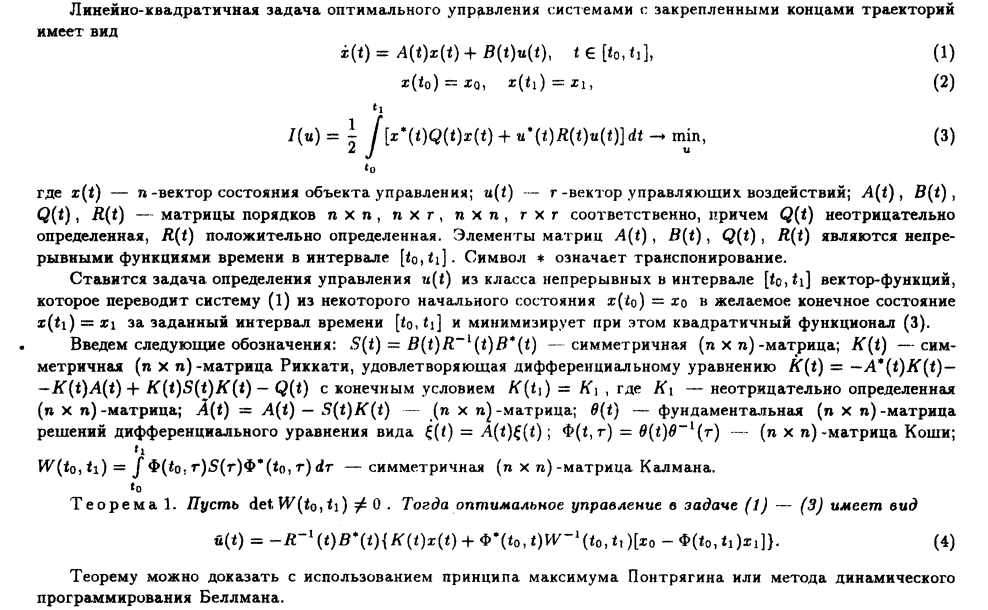

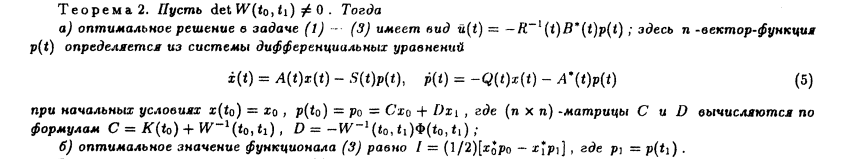

Положим для простоты:
\begin{equation}
R(t) = Q(t) = I
\end{equation}
Тогда:
\begin{equation}
J(u) = \frac{1}{2}\int_{t_0}^{t_1} |x(t)|^2 + |u(t)|^2dt \rightarrow \underset{u}{min}
\end{equation}

In [3]:
m = 2 
h = 3
r = 2
t_0 = 0 
t_1 = 5
x_0 = np.random.random(2*(m+1))
x_1 = np.random.random(2*(m+1)) + 2

In [4]:
A = np.zeros([2*(m+1),2*(m+1)])
for i in range(2*(m+1)):
    if i != 0 and i != m+2:
        A[i][i-1] = m/h
        A[i][i] = -m/h       

In [5]:
B = np.zeros([2*(m+1),r])
B[0][0] = 1
B[m+1][1] = 1

In [6]:
R = np.eye(r)
Q = np.eye(2*(m+1))

In [5]:
np.array([[1,2,3,4],[5,6,7,8]]).transpose()

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [7]:
S = np.dot(np.dot(B,LA.inv(R)),B.transpose())

In [8]:
def K_calc(k,t,A,S,Q,m):
    k = k.reshape([2*(m+1),2*(m+1)])
    dkdt = -np.dot(A.transpose(),k) - np.dot(k,A) + np.dot(np.dot(k,S),k) - Q
    return dkdt.reshape(-1)

In [17]:
#K_v = np.random.random(2*(m+1))
#K_1 = np.diag(K_v)
K_v = np.ones(2*(m+1))
K_1 = np.diag(K_v)

In [19]:
n_t = 20
t = np.linspace(t_1,t_0,n_t)
K_1 = K_1.reshape(-1)

In [20]:
K = odeint(K_calc,K_1,t, args = (A,S,Q,m))
K = K.transpose()
K = K.reshape(2*(m+1),2*(m+1),20)
#Получилась симметричная матрица!!!
#print(K[1][2])
#print(K[2][1])
#print(K[29])
#print(K[34])
#K = K.reshape(20,2*(m+1),2*(m+1))
#print(K[1][0])
#print(np.all(K == K.T))

In [21]:
A_tilde = np.zeros(n_t, dtype = object)
Xi = np.zeros(n_t, dtype = object)
for i in range(n_t):
    A_tilde[i] = A - np.dot(S,K[:,:,i])
    Xi[i] = expm(A_tilde[i]) 

In [23]:
#Xi - фундаментальная матрица в каждой из n_t точек на промежутке времени [t_0, t_1]
#Вычисление W(t_0,t_1) с помощью метода прямоугольников
step = (t_1 - t_0)/n_t
W_t0_t1 = np.zeros([2*(m+1),2*(m+1)])
for i in range(n_t):
    f_1 = np.dot(Xi[0],LA.inv(Xi[i]))
    f_2 = np.dot(f_1,S)
    f_3 = np.dot(f_2,LA.inv(Xi[i]).transpose())
    f_4 = np.dot(f_3,Xi[0].transpose())
    W_t0_t1 += step*f_4
LA.det(W_t0_t1)    
#print(W_t0_t1)
#print(W_t0_t1[2,0])    

0.0

In [ ]:
#Вычисляем оптимальное управление
u_opt = np.zeros([2*(m + 1),r])


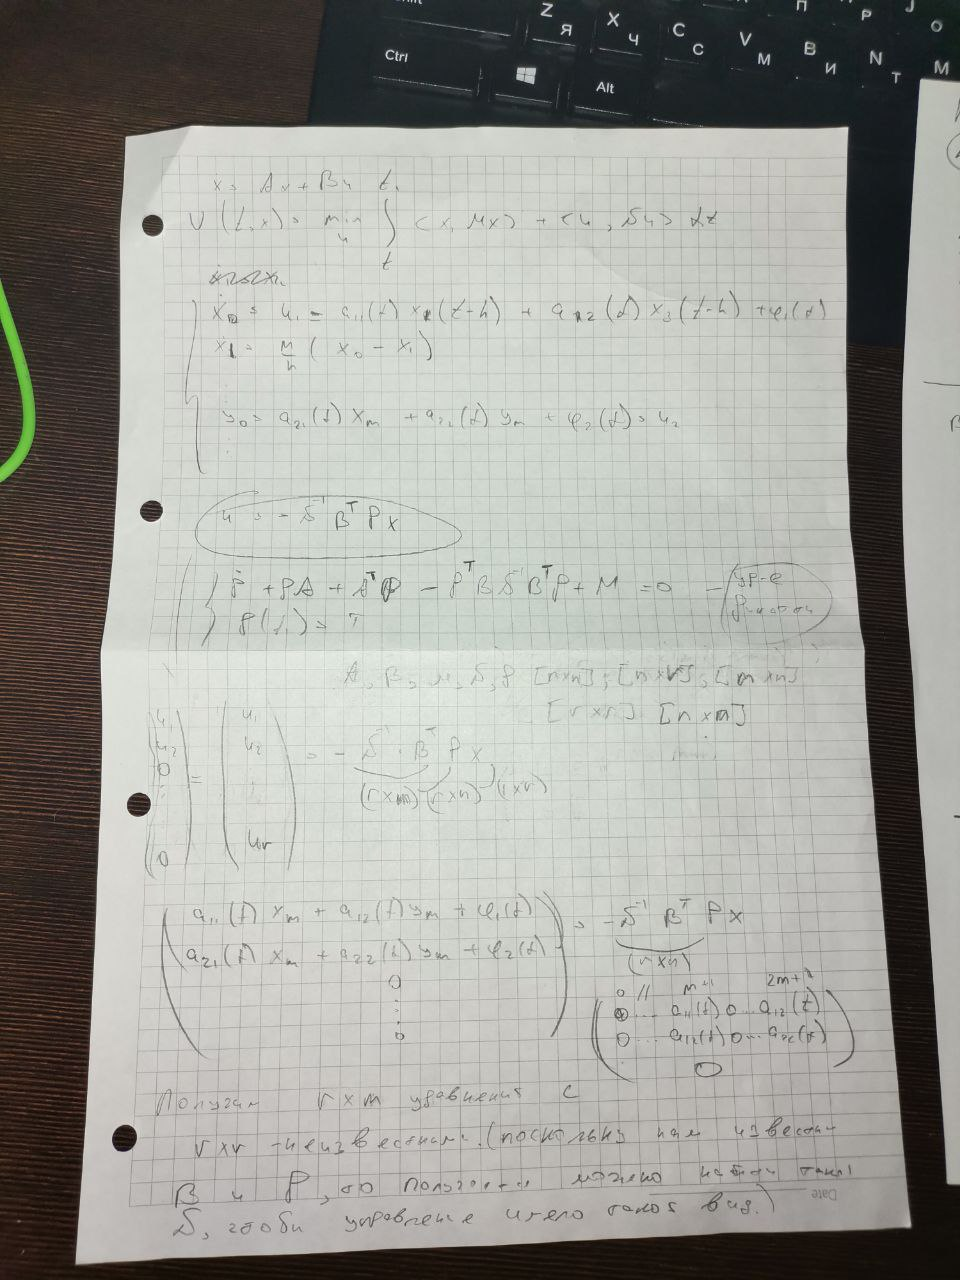

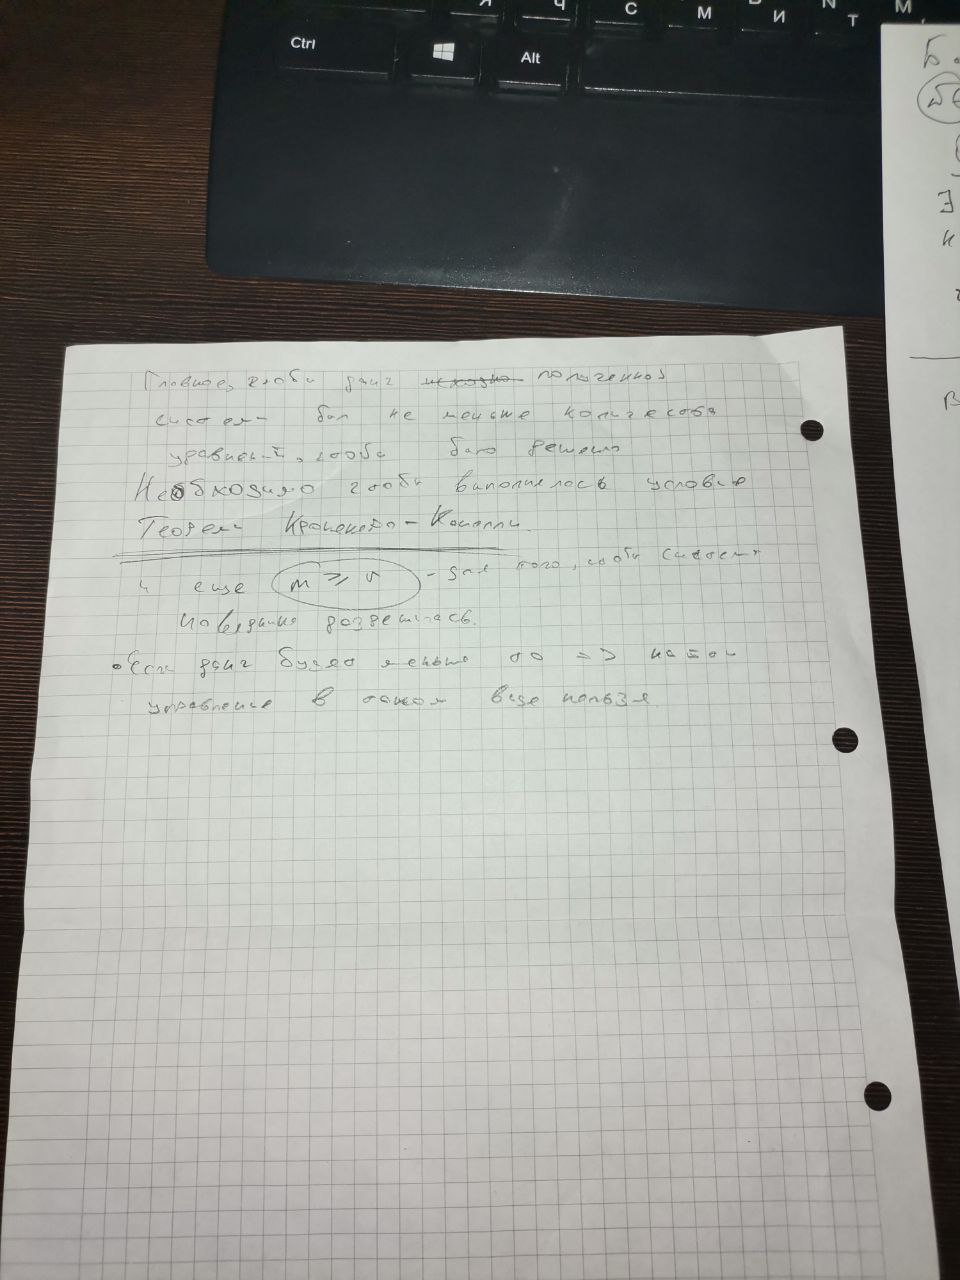

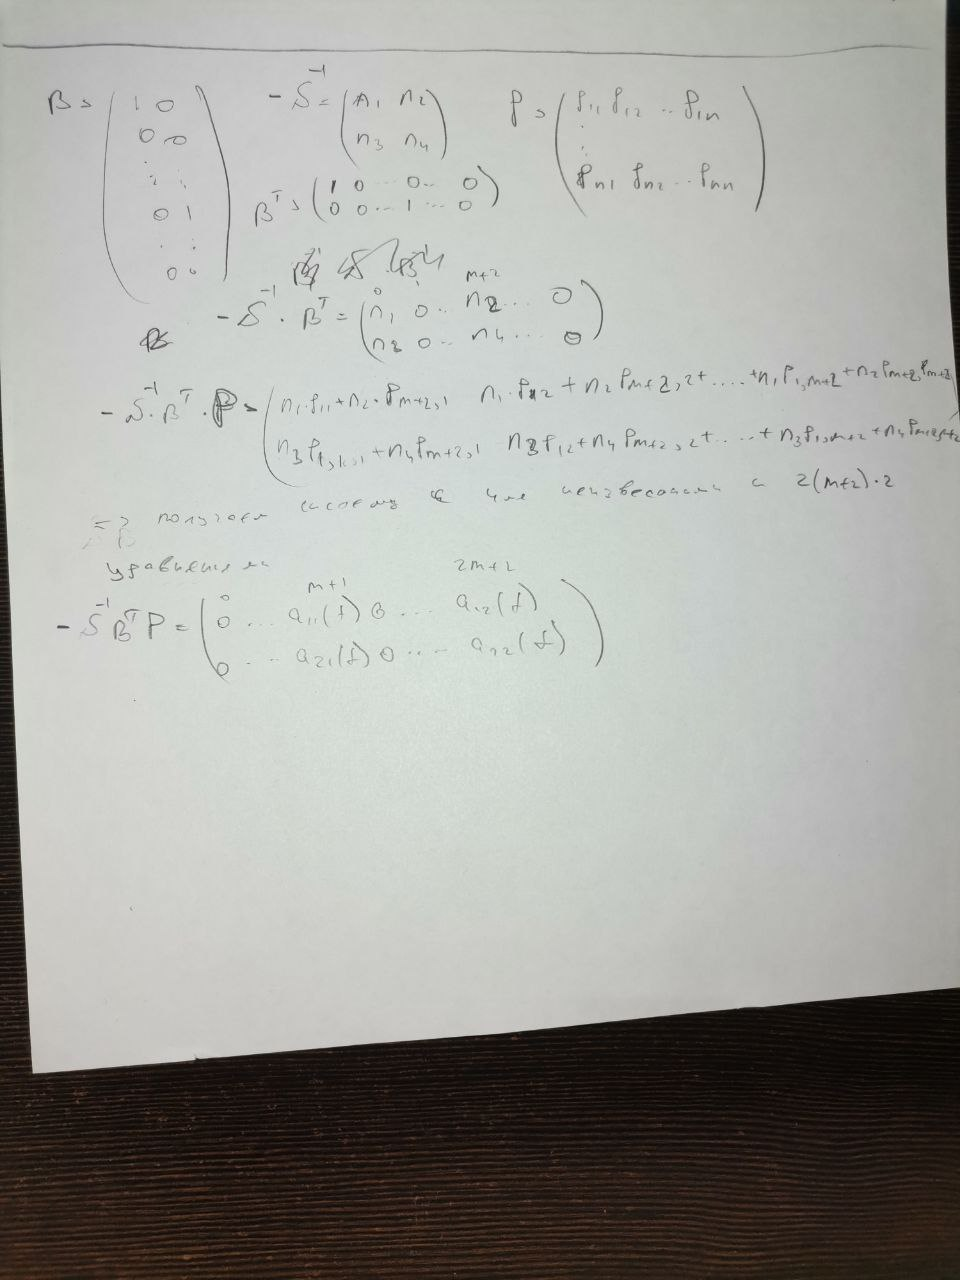